In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import hera_cal
import pyuvdata

## Estimating the cable delay for a redundant visibility ratio

 Load data

In [2]:
uvd = pyuvdata.UVData()

# data
miriad_path = '../../zen_data/zen.2458098.58037.xx.HH.uv'
uvd.read_miriad(miriad_path)

# get the redundant baselines for that data
aa = hera_cal.utils.get_aa_from_uv(uvd)
info = hera_cal.omni.aa_to_info(aa)
red_bls = np.array(info.get_reds())

From one redundant baseline select two unique separations

In [3]:
red_bl = red_bls[np.random.randint(len(red_bls))]
two_seps = [random.sample(red_bl, 2)][0]  
two_seps

[(13, 137), (14, 138)]

Get data for those separations 

In [4]:
data = {}
for sep in two_seps:
    data[sep] = uvd.get_data(sep)

Construct visibility ratio

In [5]:
V = data[two_seps[0]] * data[two_seps[1]].conjugate()

Take a look

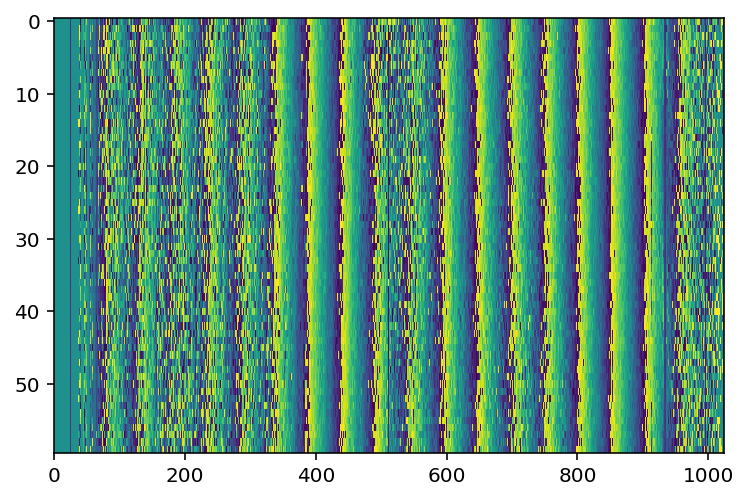

In [6]:
plt.imshow(np.angle(V), aspect = 'auto');

## Predict cable delays for data

In [9]:
import estdel
reload(estdel)

<module 'estdel' from 'estdel.py'>

In [10]:
predictor = estdel.Cable_Delay_Magnitude(V)
predictor.predict()
predictor.predictions

array([200.5, 200.5, 200.5, 200.5, 198.5, 200.5, 199.5, 199.5, 200.5,
       200.5, 201.5, 201.5, 199.5, 200.5, 200.5, 200.5, 198.5, 199.5,
       200.5, 198.5, 199.5, 200.5, 200.5, 199.5, 200.5, 201.5, 199.5,
       200.5, 199.5, 200.5, 199.5, 199.5, 198.5, 199.5, 198.5, 198.5,
       202.6, 200.5, 199.5, 200.5, 198.5, 200.5, 201.5, 200.5, 200.5,
       199.5, 201.5, 200.5, 200.5, 200.5, 199.5, 199.5, 200.5, 200.5,
       200.5, 200.5, 199.5, 200.5, 200.5, 200.5])

In [11]:
predictor.raw_predictions

[0.0196,
 0.0196,
 0.0196,
 0.0196,
 0.0194,
 0.0196,
 0.0195,
 0.0195,
 0.0196,
 0.0196,
 0.019700000000000002,
 0.019700000000000002,
 0.0195,
 0.0196,
 0.0196,
 0.0196,
 0.0194,
 0.0195,
 0.0196,
 0.0194,
 0.0195,
 0.0196,
 0.0196,
 0.0195,
 0.0196,
 0.019700000000000002,
 0.0195,
 0.0196,
 0.0195,
 0.0196,
 0.0195,
 0.0195,
 0.0194,
 0.0195,
 0.0194,
 0.0194,
 0.0198,
 0.0196,
 0.0195,
 0.0196,
 0.0194,
 0.0196,
 0.019700000000000002,
 0.0196,
 0.0196,
 0.0195,
 0.019700000000000002,
 0.0196,
 0.0196,
 0.0196,
 0.0195,
 0.0195,
 0.0196,
 0.0196,
 0.0196,
 0.0196,
 0.0195,
 0.0196,
 0.0196,
 0.0196]